<h1 style="color:red;"/>Ingreso e incidendencia de la pobreza</h1>

Librerías utilizadas.

In [143]:
# librerías
library(readr)
library(tidyverse)
library(ggrepel)

Warning message:
“package ‘ggrepel’ was built under R version 4.1.3”


In [69]:
# directorios
carpeta <- "../../data/processed/Bienestar material y sustento"
graficas <- "../../graphs"

In [55]:
# Entidades de análisis
entidades <- c("Colombia", "Chocó", "Quibdó", "Istmina")

# Colores definidos por Entidad
colores_entidad <- c(
  "Quibdó"   = "#E6550D",  # Naranja vibrante y oscuro (para destacar)
  "Istmina"  = "#3182BD",  # Azul fuerte y claro (para destacar, distinto al naranja)
  "Chocó"    = "#756BB1",  # Morado/Lila apagado (contexto regional, menos intenso)
  "Colombia" = "#969696" 
)

<h2 style="color:blue;"/>Coeficiente Gini</h2>

In [80]:
# Importar Base de datos
archivo <- "Pobreza Indicadores e Incidencia.csv"
ruta_archivo <- file.path(carpeta, archivo)
gini <- read.csv(ruta_archivo, dec = ",")

In [81]:
# Filtrar base por Coeficiente Gini y entidades de análisis
gini <- gini %>%
    filter(Indicador == "Coeficiente de Gini" & 
           Entidad %in% entidades &
           Año >= 2011 & Año <= 2020
          )

# Seleccionar columnas de interés
gini <- gini %>% 
    select(Entidad, Año, Dato.Numérico)

In [82]:
head(gini)

,Entidad,Año,Dato.Numérico
,<chr>,<int>,<dbl>
1,Chocó,2011,0.57
2,Quibdó,2011,0.51
3,Colombia,2011,0.55
4,Colombia,2012,0.54
5,Quibdó,2012,0.55
6,Chocó,2012,0.62


Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”


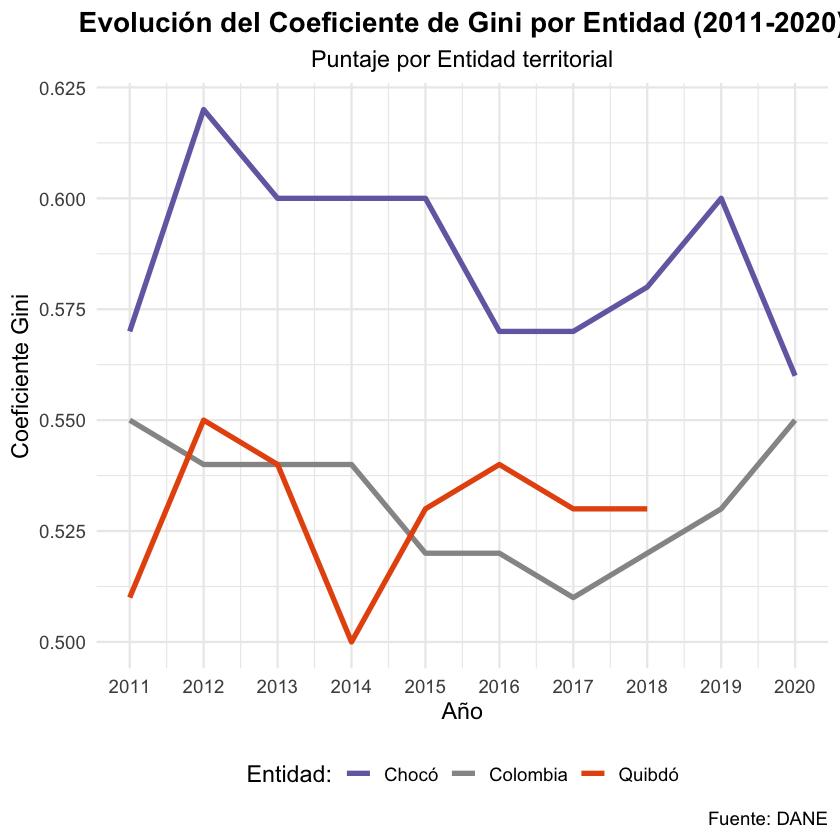

In [154]:
rango_anios <- range(gini$Año, na.rm = TRUE)
todos_los_anios_en_rango <- seq(from = rango_anios[1], to = rango_anios[2], by = 1)

# Gráfica de líneas
dim_2_graf_1_coeficiente_gini <- 
    ggplot(gini, aes(x = Año, y = Dato.Numérico)) +
    geom_line(aes(color = Entidad), linewidth = 1.5) + 
    scale_color_manual(values = colores_entidad) +
    scale_x_continuous(
        breaks = todos_los_anios_en_rango, 
        labels = todos_los_anios_en_rango) +
    labs(
        title = "Evolución del Coeficiente de Gini por Entidad (2011-2020)",
        subtitle = "Puntaje por Entidad territorial", 
        x = "Año",
        y = "Coeficiente Gini",
        color = "Entidad:",
        caption = "Fuente: DANE"
    ) +
    theme_minimal(base_size = 14) + 
    theme(
        plot.title = element_text(hjust = 0.5, face = "bold"), 
        plot.subtitle = element_text(hjust = 0.5),       
        strip.text = element_text(face = "bold", size = 12), 
        axis.text.x = element_text(angle = 0, hjust = 0.5), 
        legend.position = "bottom"
    )

# Mostrar la gráfica
print(dim_2_graf_1_coeficiente_gini)

In [155]:
# Guardar la gráfica 
nombre_grafica <- "dim_2_graf_1_coeficiente_gini.png" 
ruta_grafica <- file.path(graficas, nombre_grafica)
ancho_pulgadas <- 10  
alto_pulgadas <- 6    
resolucion_dpi <- 300

ggsave(filename = ruta_grafica,
       plot = dim_2_graf_1_coeficiente_gini,
       width = ancho_pulgadas,
       height = alto_pulgadas,
       dpi = resolucion_dpi)

cat(paste("Gráfica guardada como", 
          nombre_grafica, "con dimensiones:", 
          ancho_pulgadas, "x", 
          alto_pulgadas, "pulgadas y", 
          resolucion_dpi, "DPI.\n"))

Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”


Gráfica guardada como dim_2_graf_1_coeficiente_gini.png con dimensiones: 10 x 6 pulgadas y 300 DPI.


<h2 style="color:blue;"/>Pobreza monetaria</h2>

In [133]:
# Importar Base de datos
archivo <- "Pobreza Indicadores e Incidencia.csv"
ruta_archivo <- file.path(carpeta, archivo)
pob_monetaria <- read.csv(ruta_archivo, dec = ",")

In [134]:
# Filtrar base por Pobreza monetaria y entidades de análisis
pob_monetaria <- pob_monetaria %>%
    filter(
        Indicador %in% c("Incidencia de pobreza monetaria en hombres - Actualización metodológica", 
                         "Incidencia de pobreza monetaria en mujeres - Actualización metodológica") & 
           Año == 2020
          )

# Seleccionar columnas de interés
pob_monetaria <- pob_monetaria %>% 
    select(Entidad, Indicador, Dato.Numérico)

# Eliminar valores NA
pob_monetaria <- pob_monetaria %>%
    filter(!is.na(Dato.Numérico))

In [135]:
head(pob_monetaria)

,Entidad,Indicador,Dato.Numérico
,<chr>,<chr>,<dbl>
1,Colombia,Incidencia de pobreza monetaria en hombres - Actualización metodológica,41.7
2,Atlántico,Incidencia de pobreza monetaria en hombres - Actualización metodológica,39.6
3,Barranquilla,Incidencia de pobreza monetaria en hombres - Actualización metodológica,41.1
4,Bogotá,Incidencia de pobreza monetaria en hombres - Actualización metodológica,39.6
5,Medellín,Incidencia de pobreza monetaria en hombres - Actualización metodológica,32.6
6,Antioquia,Incidencia de pobreza monetaria en hombres - Actualización metodológica,33.2


In [136]:
# Definir los nombres exactos de los indicadores para evitar errores de tipeo
indicador_hombres <- "Incidencia de pobreza monetaria en hombres - Actualización metodológica"
indicador_mujeres <- "Incidencia de pobreza monetaria en mujeres - Actualización metodológica"

# Simplificar los nombres de los indicadores para usarlos como columnas
pob_monetaria <- pob_monetaria %>%
  mutate(Indicador_corto = case_when(
    Indicador == indicador_hombres ~ "pobreza_hombres",
    Indicador == indicador_mujeres ~ "pobreza_mujeres",
    TRUE ~ NA_character_ 
  )) %>%
  filter(!is.na(Indicador_corto)) # Nos aseguramos de tener solo los indicadores de interés

# Transformar de formato largo a ancho
pob_monetaria <- pob_monetaria %>%
  pivot_wider(
    id_cols = Entidad,               # Cada fila será una Entidad única
    names_from = Indicador_corto,    # Las nuevas columnas vendrán de aquí
    values_from = Dato.Numérico      # Los valores para esas nuevas columnas
  )

# Verificar que la transformación fue exitosa (opcional)
#print(head(pob_monetaria))
# Deberías tener columnas: Entidad, pobreza_hombres, pobreza_mujeres

pob_monetaria <- pob_monetaria %>%
  mutate(
    color_grupo = ifelse(Entidad %in% entidades, "Destacado", "Otro")
  ) %>%
  # Asegurarnos de que no haya NAs en las columnas que vamos a graficar,
  # ya que pivot_wider podría generar NAs si para alguna entidad falta uno de los indicadores.
  filter(!is.na(pobreza_hombres) & !is.na(pobreza_mujeres))

# Verificar datos para graficar (opcional)
head(pob_monetaria)

Entidad,pobreza_hombres,pobreza_mujeres,color_grupo
<chr>,<dbl>,<dbl>,<chr>
Colombia,41.7,43.4,Destacado
Atlántico,39.6,40.8,Otro
Barranquilla,41.1,41.3,Otro
Bogotá,39.6,40.7,Otro
Medellín,32.6,33.2,Otro
Antioquia,33.2,34.7,Otro


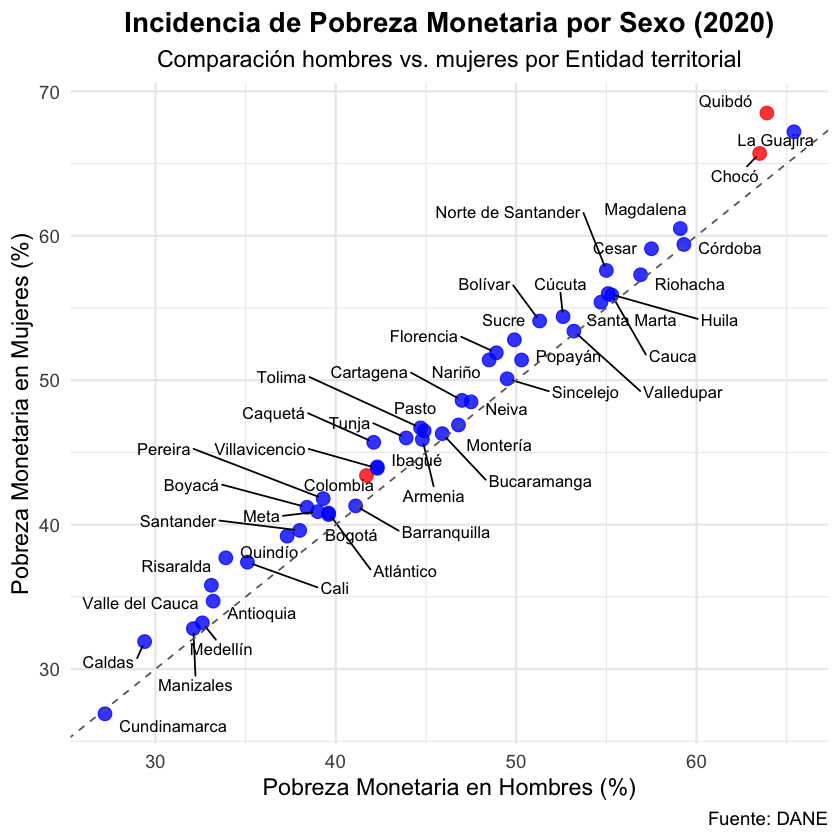

In [156]:
# Definir los colores
colores_scatter <- c("Destacado" = "red", "Otro" = "blue")

# Crear la gráfica
dim_2_graf_2_dispersion_pobreza <- 
  ggplot(pob_monetaria, aes(x = pobreza_hombres, y = pobreza_mujeres)) +
  geom_point(aes(color = color_grupo), size = 3.5, alpha = 0.8) +
  scale_color_manual(values = colores_scatter) +
  geom_text_repel(
    aes(label = Entidad),
    size = 3.5,         
    box.padding = 0.5,  
    point.padding = 0.3, 
    max.overlaps = Inf   
  ) +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "gray40") + 
  labs(
    title = "Incidencia de Pobreza Monetaria por Sexo (2020)",
    subtitle = "Comparación hombres vs. mujeres por Entidad territorial",
    x = "Pobreza Monetaria en Hombres (%)",
    y = "Pobreza Monetaria en Mujeres (%)",
    caption = "Fuente: DANE"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5),
    legend.position = "none" # O "bottom", "right", "none"
  )

# Mostrar la gráfica
print(dim_2_graf_2_dispersion_pobreza)

# Guardar la gráfica (opcional)
# ggsave("dispersion_pobreza_genero_entidad.png", plot = grafica_dispersion_pobreza, width = 10, height = 8, dpi = 300)

In [158]:
# Guardar la gráfica 
nombre_grafica <- "dim_2_graf_2_dispersion_pobreza.png" 
ruta_grafica <- file.path(graficas, nombre_grafica)
ancho_pulgadas <- 10  
alto_pulgadas <- 10   
resolucion_dpi <- 300

ggsave(filename = ruta_grafica,
       plot = dim_2_graf_2_dispersion_pobreza,
       width = ancho_pulgadas,
       height = alto_pulgadas,
       dpi = resolucion_dpi)

cat(paste("Gráfica guardada como", 
          nombre_grafica, "con dimensiones:", 
          ancho_pulgadas, "x", 
          alto_pulgadas, "pulgadas y", 
          resolucion_dpi, "DPI.\n"))

Gráfica guardada como dim_2_graf_2_dispersion_pobreza.png con dimensiones: 10 x 10 pulgadas y 300 DPI.


<h2 style="color:blue;"/>Tasa de desempleo</h2>